# Lab 1: Introduction to Time Series and Plots

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

create plot ulitities

In [ ]:
def plot_series(time, series, format='-', start=0, end=None, label=None):
  '''
  plot time and its series

  args:
    time (array of int): time used in series
    series (array of int): measures per time
    format (string): line type to plot
    start (int): start time
    end (int): end time
    label (string): to create legend
  '''

  plt.figure(figsize=(10,6))
  plt.plot(time[start:end], series[start:end], format)
  plt.xlabel('Time')
  plt.ylabel('Value')

  if label:
    plt.legend(f'labels: {label}')

  plt.grid(True)
  plt.show()

Trend to show graph upward/downward

In [ ]:
def trend(time, slope=0):
  '''
  to create series that show trend

  args:
    time (array of int): time steps
    slope (int): the gradient to show the skewed

  returns:
    series (array of float): trend series
  '''
  series = slope * time

  return series

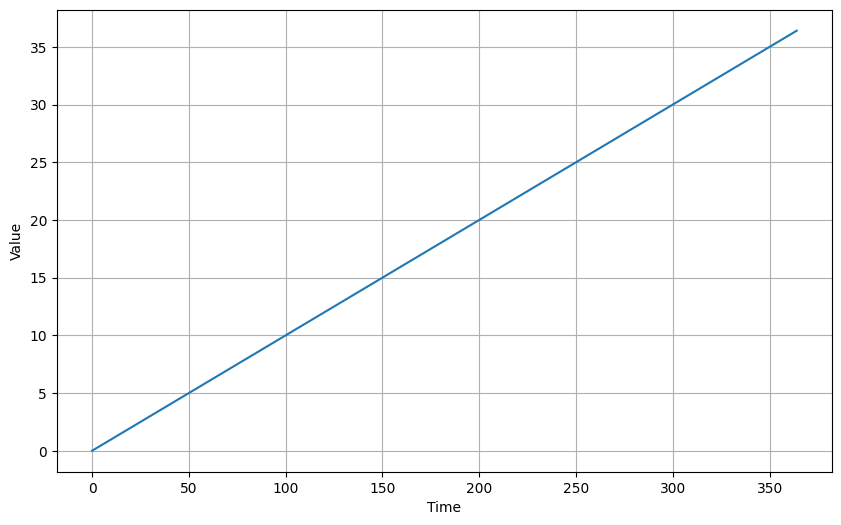

In [ ]:
time = np.arange(365)

slope = 0.1

series = trend(time, slope)

plot_series(time, series)

In [ ]:
def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish

    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    """
    repeats the same pattern at each period

    args:
      time (array of int): time steps
      period (int): tim steps before the next pattern
      amplitude (int): amplify the value
      phase (int): number of time steps to shift the measured values

    returns:
      data_pattern (array of float): seasonal data scaled by amplitude
    """

    season_time = ((time + phase) % period) / period

    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

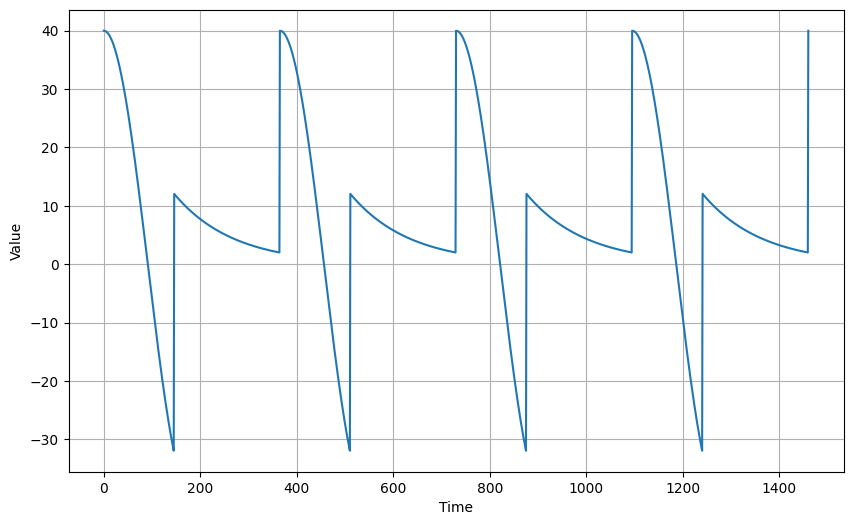

In [ ]:
time = np.arange(4 * 365 + 1)

period = 365
amplitude = 40

series = seasonality(time, period=period, amplitude=amplitude)

plot_series(time, series)

seasonality & trend

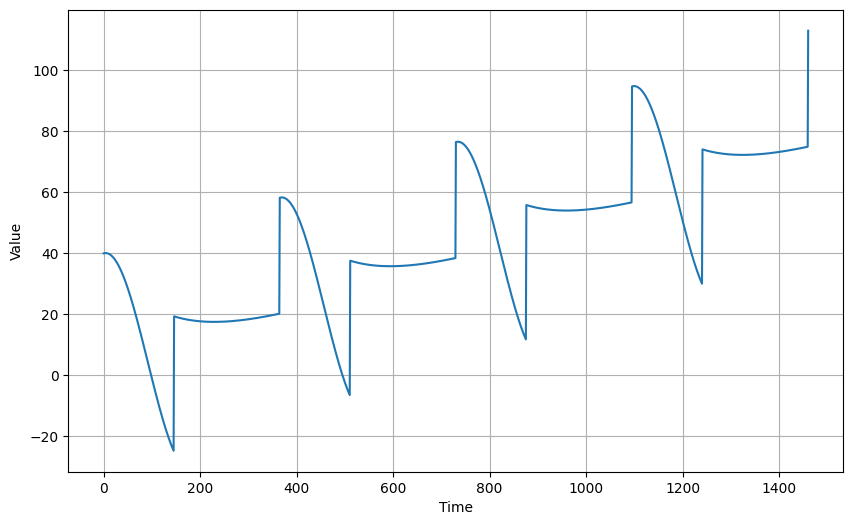

In [ ]:
slope = 0.05
period = 365
amplitude = 40

series = trend(time, slope) + seasonality(time=time, period=period, amplitude=amplitude)

plot_series(time, series)

In [ ]:
def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal

    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level

    return noise


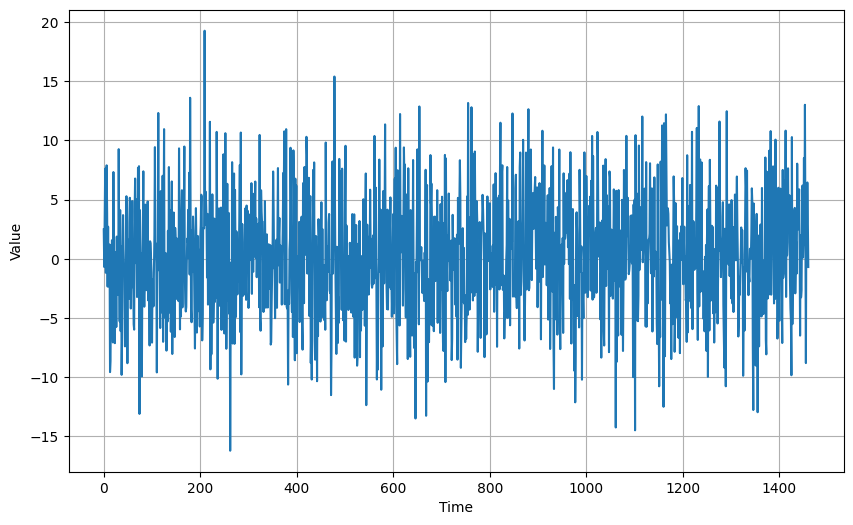

In [ ]:
# generate noise plot

noise_level = 5

noise = noise(time, noise_level=noise_level, seed=42)

plot_series(time, noise)

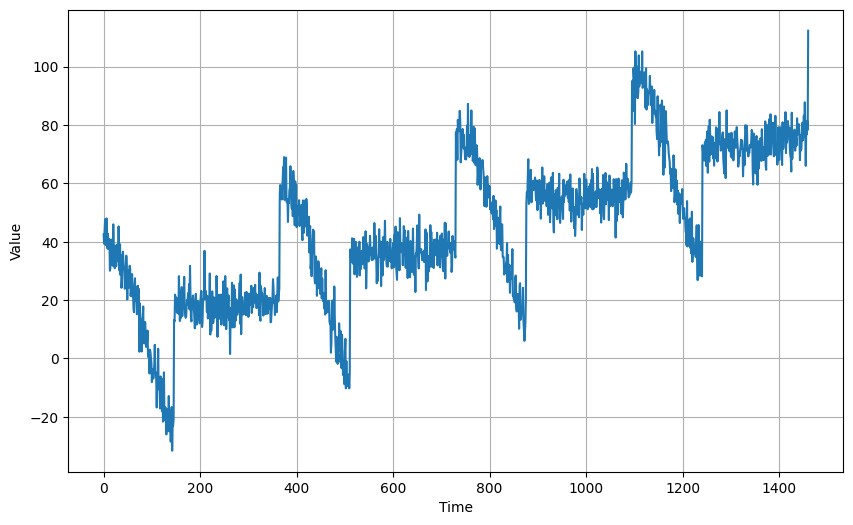

In [ ]:
series += noise

plot_series(time, series)

autocorrlelated corelates time steps with another

In [ ]:
def autocorrelation(time, amplitude, seed=None):
    """
    Generates autocorrelated data

    Args:
      time (array of int) - contains the time steps
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      ar (array of float) - autocorrelated data
    """

    # Initialize random number generator
    rnd = np.random.RandomState(seed)

    # Initialize array of random numbers equal to the length
    # of the given time steps plus 50
    ar = rnd.randn(len(time) + 50)

    # Set first 50 elements to a constant
    ar[:50] = 100

    # Define scaling factors
    phi1 = 0.5
    phi2 = -0.1

    # Autocorrelate element 51 onwards with the measurement at
    # (t-50) and (t-30), where t is the current time step
    for step in range(50, len(time) + 50):
        ar[step] += phi1 * ar[step - 50]
        ar[step] += phi2 * ar[step - 33]

    # Get the autocorrelated data and scale with the given amplitude.
    # The first 50 elements of the original array is truncated because
    # those are just constant and not autocorrelated.
    ar = ar[50:] * amplitude

    return ar

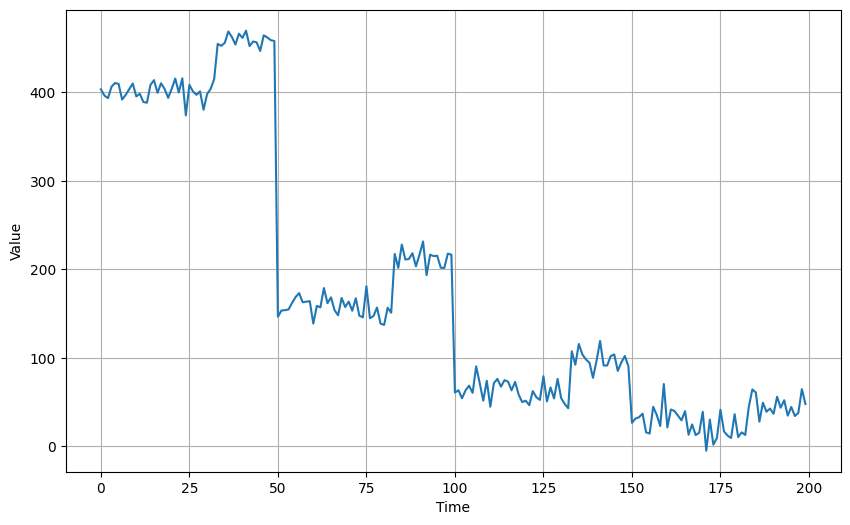

In [ ]:
# Use time steps from previous section and generate autocorrelated data
series = autocorrelation(time, amplitude=10, seed=42)

# Plot the first 200 elements to see the pattern more clearly
plot_series(time[:200], series[:200])

In [ ]:
def autocorrelation(time, amplitude, seed=None):
    """
    Generates autocorrelated data

    Args:
      time (array of int) - contains the time steps
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      ar (array of float) - generated autocorrelated data
    """

    # Initialize random number generator
    rnd = np.random.RandomState(seed)

    # Initialize array of random numbers equal to the length
    # of the given time steps plus an additional step
    ar = rnd.randn(len(time) + 1)

    # Define scaling factor
    phi = 0.8

    # Autocorrelate element 11 onwards with the measurement at
    # (t-1), where t is the current time step
    for step in range(1, len(time) + 1):
        ar[step] += phi * ar[step - 1]

    # Get the autocorrelated data and scale with the given amplitude.
    ar = ar[1:] * amplitude

    return ar

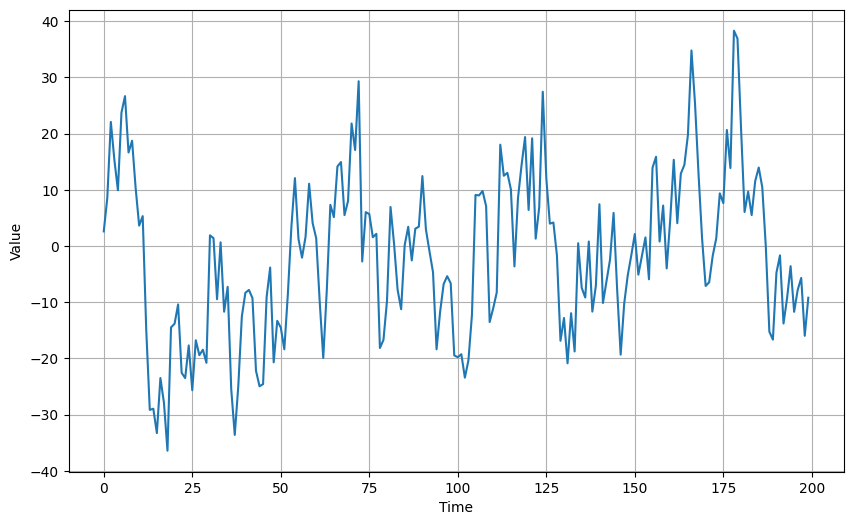

In [ ]:
# Use time steps from previous section and generate autocorrelated data
series = autocorrelation(time, amplitude=10, seed=42)

# Plot the results
plot_series(time[:200], series[:200])

impulses that makes series decay

In [ ]:
def impulses(time, num_impulses, amplitude=1, seed=None):
    """
    Generates random impulses

    Args:
      time (array of int) - contains the time steps
      num_impulses (int) - number of impulses to generate
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      series (array of float) - array containing the impulses
    """

    # Initialize random number generator
    rnd = np.random.RandomState(seed)

    # Generate random numbers
    impulse_indices = rnd.randint(len(time), size=num_impulses)

    # Initialize series
    series = np.zeros(len(time))

    # Insert random impulses
    for index in impulse_indices:
        series[index] += rnd.rand() * amplitude

    return series

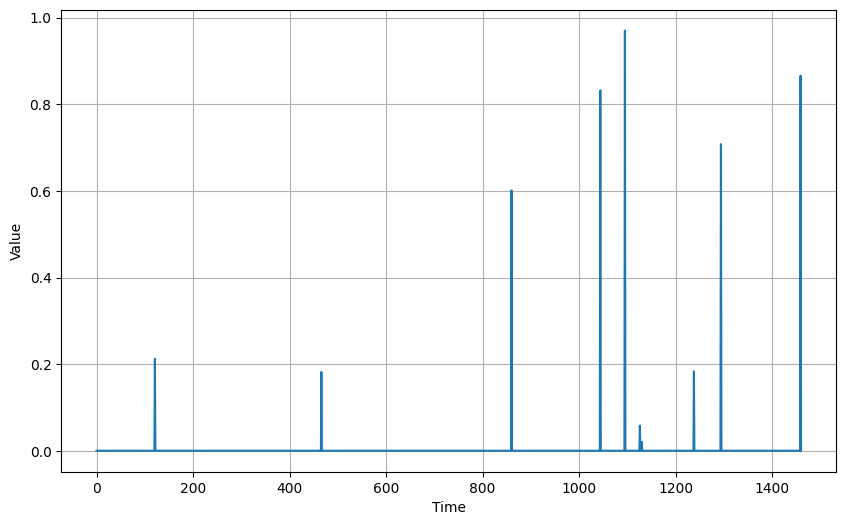

In [ ]:
# Generate random impulses
impulses_signal = impulses(time, num_impulses=10, seed=42)

# Plot the results
plot_series(time, impulses_signal)

In [ ]:
def autocorrelation_impulses(source, phis):
    """
    Generates autocorrelated data from impulses

    Args:
      source (array of float) - contains the time steps with impulses
      phis (dict) - dictionary containing the lag time and decay rates

    Returns:
      ar (array of float) - generated autocorrelated data
    """

    # Copy the source
    ar = source.copy()

    # Compute new series values based on the lag times and decay rates
    for step, value in enumerate(source):
        for lag, phi in phis.items():
            if step - lag > 0:
              ar[step] += phi * ar[step - lag]

    return ar

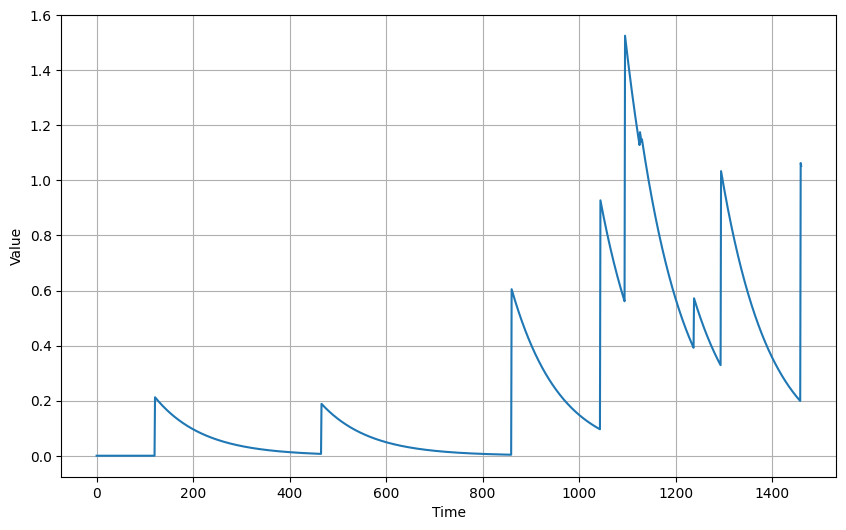

In [ ]:
# Use the impulses from the previous section and generate autocorrelated data
series = autocorrelation_impulses(impulses_signal, {1: 0.99})

# Plot the results
plot_series(time, series)

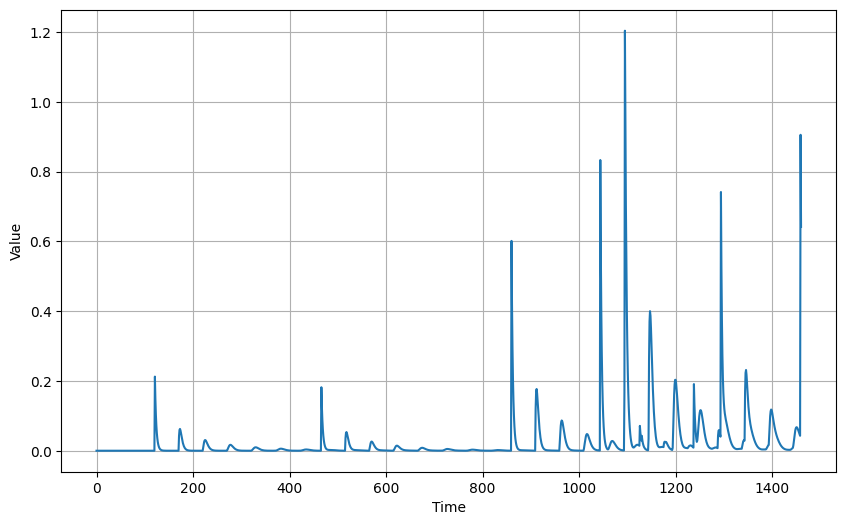

In [ ]:
# Use the impulses from the previous section and generate autocorrelated data
series = autocorrelation_impulses(impulses_signal, {1: 0.70, 50: 0.2})

# Plot the results
plot_series(time, series)

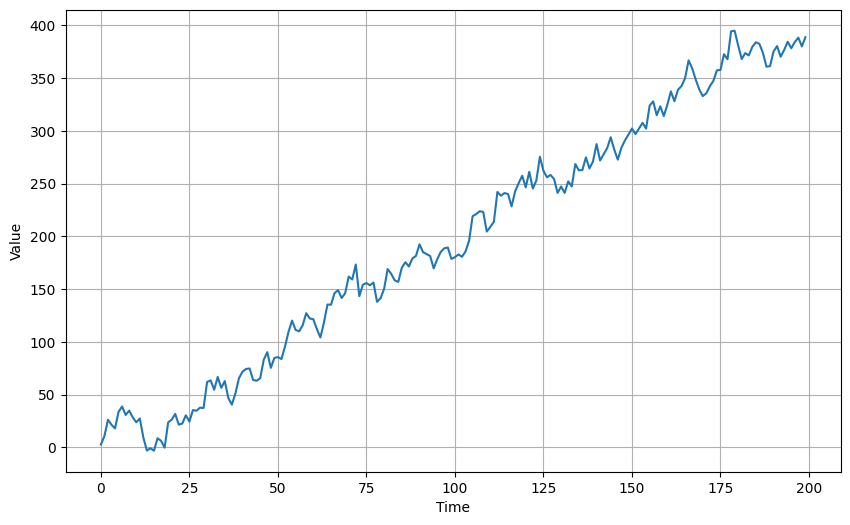

In [ ]:
# Generate autocorrelated data with an upward trend
series = autocorrelation(time, 10, seed=42) + trend(time, 2)

# Plot the results
plot_series(time[:200], series[:200])

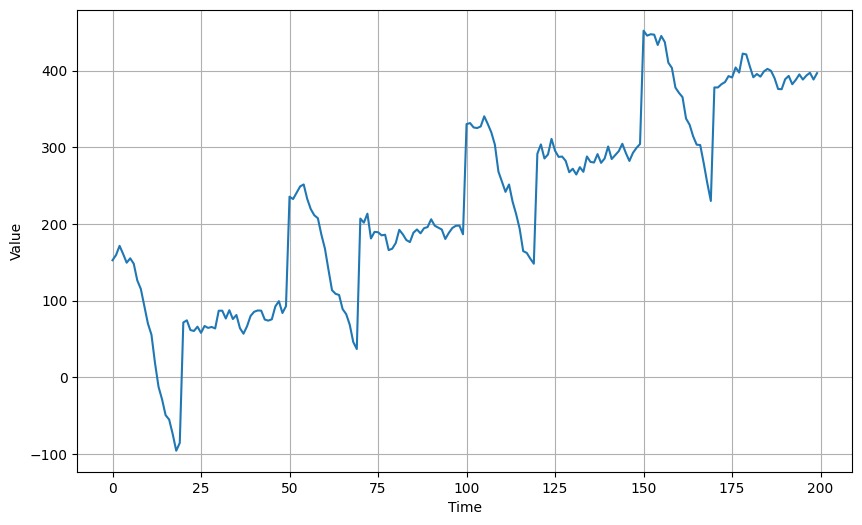

In [ ]:
# Generate autocorrelated data with an upward trend
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)

# Plot the results
plot_series(time[:200], series[:200])


non-stationery time series

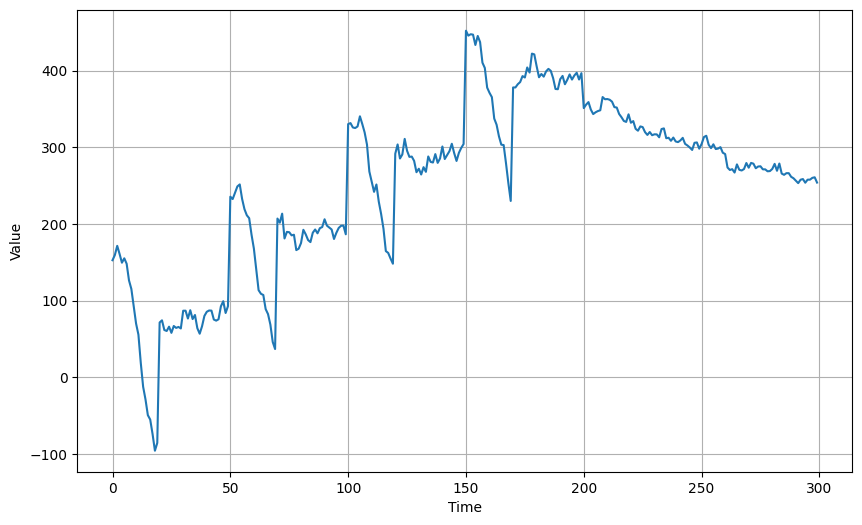

In [ ]:
# Generate data with positive trend
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)

# Generate data with negative trend
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550

# Splice the downward trending data into the first one at time step = 200
series[200:] = series2[200:]

# Plot the result
plot_series(time[:300], series[:300])

In cases like this, you may want to train your model on the later steps (i.e. starting at t=200) since these present a stronger predictive signal to future time steps.

#Lab 2: Statistical Forecasting on Synthetic Data

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Utilities

In [ ]:
def plot_series(time, series, format='-', start=0, end=None):
    '''
    create plot time series

    args:
      time (array of int): time steps
      series (array of float):  measured values
      format (string): line style to plot
      start (int): start index
      end (int): end index
    '''

    plt.figure(figsize=(10, 6))

    if type(series) is tuple:
      for num_series in series:
        plt.plot(time[start:end], num_series[start:end], format)
    else:
      plt.plot(time[start:end], series[start: end], format)

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

In [ ]:
def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series

def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish

    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """

    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal
    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level

    return noise

## Generate Synthetic Data

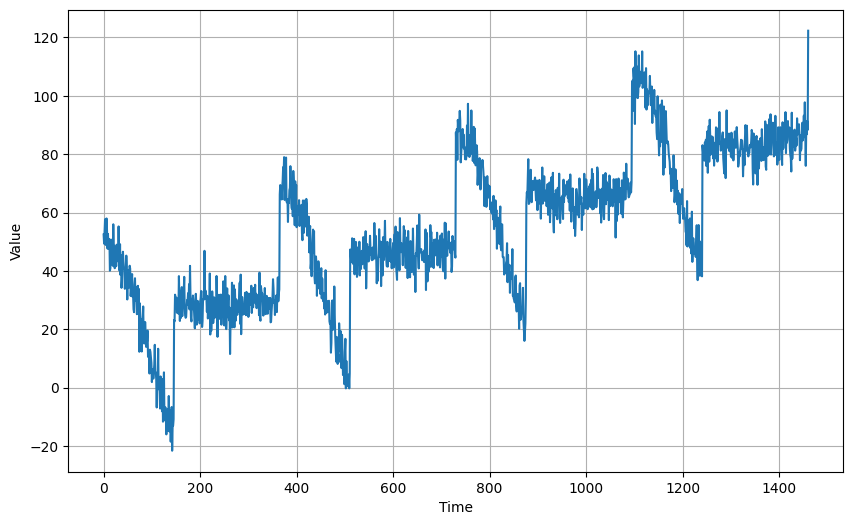

In [ ]:
time = np.arange(4 * 365 + 1, dtype='float32')

baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

series = baseline + seasonality(time, period=365, amplitude=amplitude) + trend(time, slope=slope)

series += noise(time, noise_level=noise_level, seed=42)

plot_series(time, series)

## Split the data

In [ ]:
split_time = 1000

time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]


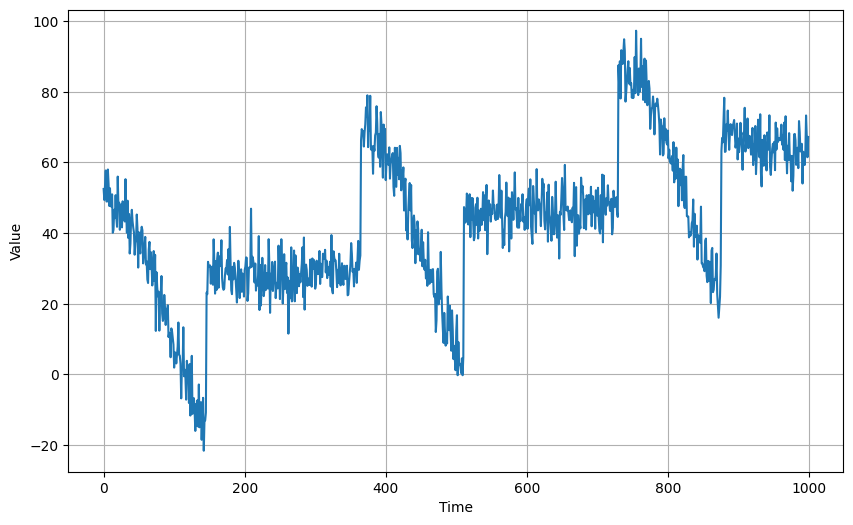

In [ ]:
plot_series(time_train, x_train)

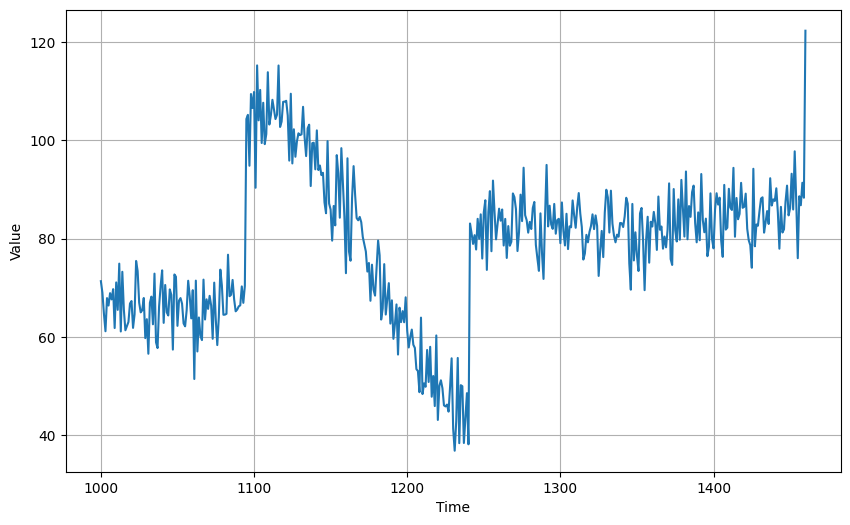

In [ ]:
plot_series(time_valid, x_valid)

## Naive Forecast

naive forecast predict the values the same as the previous values at time_stamp -1

In [ ]:
naive_forecast = series[split_time-1: -1]

time_step = 100

print(f'Original ground at time step 100: {x_valid[100]}')
print(f'Predicted value at time step {time_step + 1}: {naive_forecast[time_step + 1]}')

Original ground at time step 100: 109.84197998046875
Predicted value at time step 101: 109.84197998046875


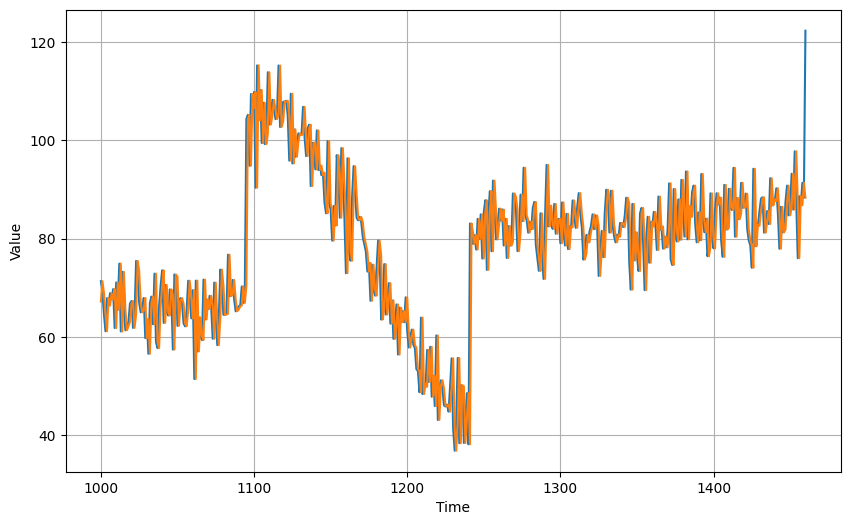

In [ ]:
plot_series(time_valid, (x_valid, naive_forecast))

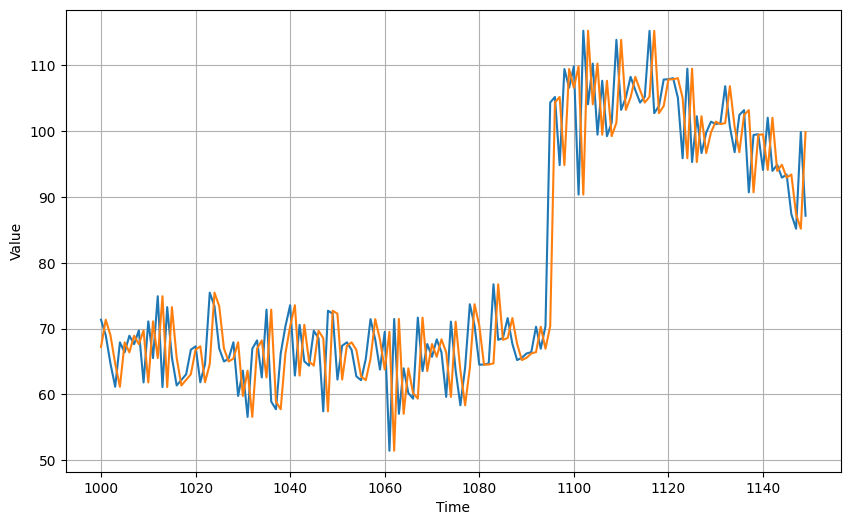

In [ ]:
plot_series(time_valid, (x_valid, naive_forecast), start = 0, end=150)

### Computing Metrics

In [ ]:
print(tf.keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

61.827538
5.9379086


## Moving Average
It can predict the values as a mean of a number of time steps before current time step

In [ ]:
def moving_average_forecast(series, window_size):
    '''
    to predict values of a time step in a series

    args:
      series (array of float): emasurement values of time steps
      window_size (int): length of timesteps to calculate mean from

    returns:
      forecast (array of float): the moving average forecast
    '''
    forecast = []

    for time in range(len(series) - window_size): # bcs the mean calculation of window_size length, need to cut the data
      forecast.append(series[time: time + window_size].mean())

    forecast = np.array(forecast)

    return forecast

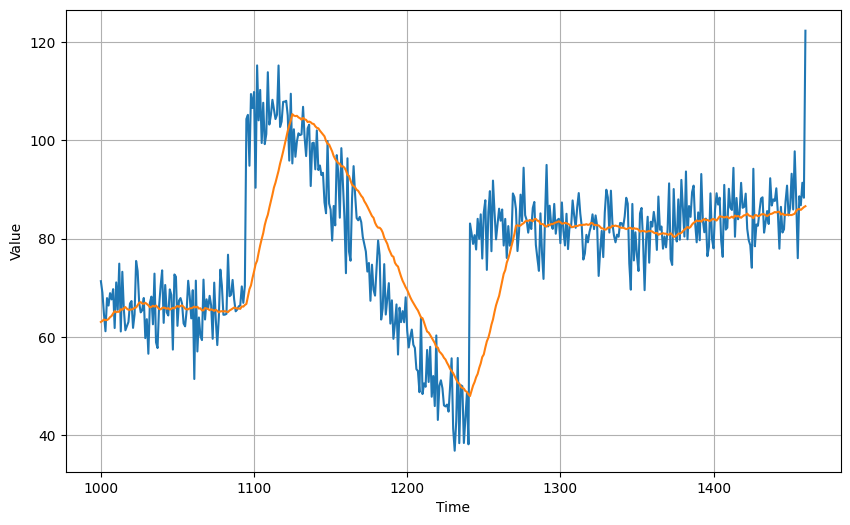

In [ ]:
moving_avg  = moving_average_forecast(series, 30)[split_time-30:] # moving_avg create predictions and truncate the last -window_size

plot_series(time_valid, (x_valid, moving_avg))

In [ ]:
print(tf.keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())


106.674576
7.142419


That's worse than naive forecast! The moving average does not anticipate trend or seasonality. In particular, those huge spikes in the original series causes big deviations as shown in the plot above. You will try to remove these characteristics of the dataset with time differencing and see if you get better results.

###Differencing
to remove the trend and seasonality from the data by substracting series by the same before period

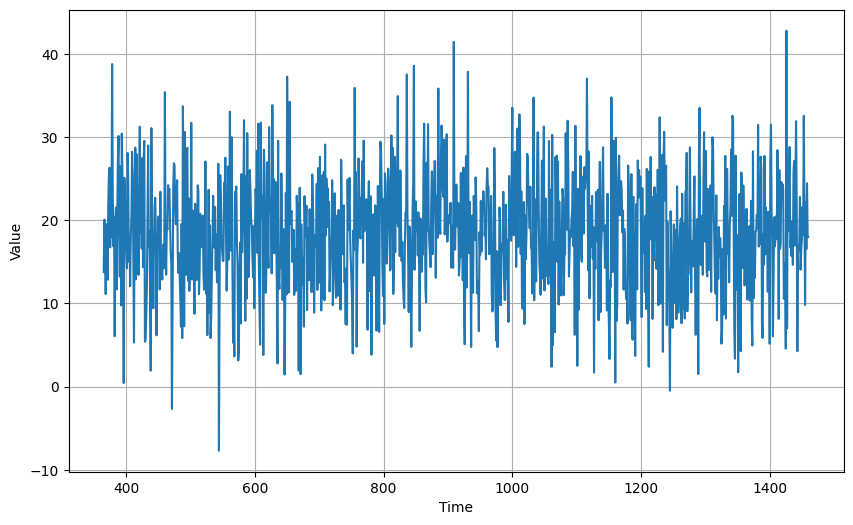

In [ ]:
diff_series = series[365:] - series[:-365]

diff_time = time[365:]

plot_series(diff_time, diff_series)

then, we use moving_average_forecast  to make prediction on diff_series (original series that already modified to remove the seasonality and trend)

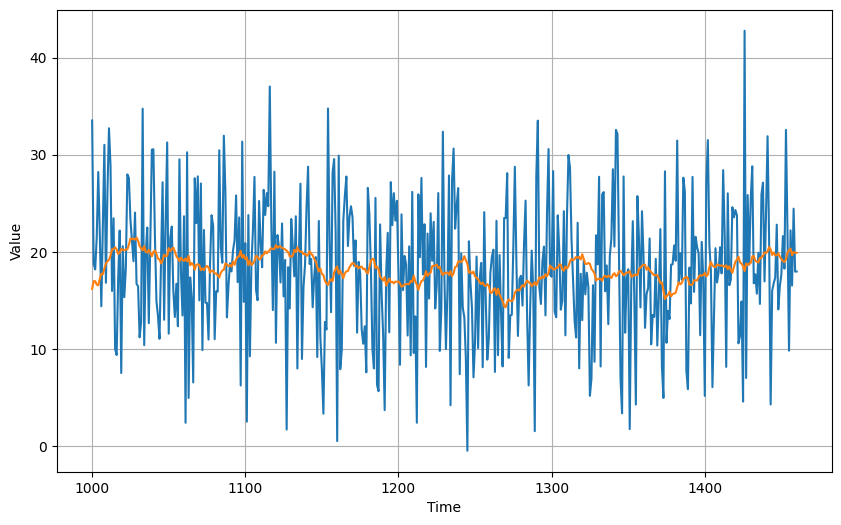

In [ ]:
diff_moving_average = moving_average_forecast(diff_series, 30)

# adjust diff_moving_average with time_valid
diff_moving_average = diff_moving_average[split_time - 365 - 30:]

diff_series = diff_series[split_time - 365:]

plot_series(time_valid, (diff_series, diff_moving_average))

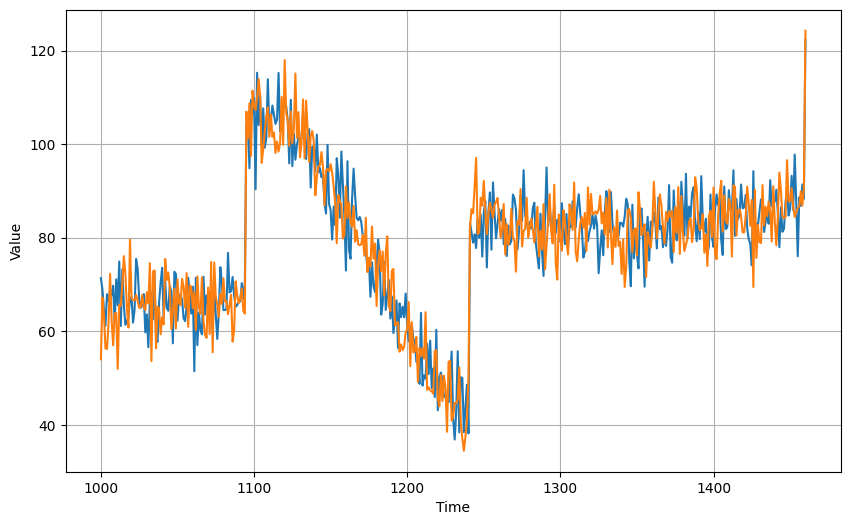

In [ ]:
diff_moving_avg_plus_past = series[split_time-365: -365] + diff_moving_average

plot_series(time_valid, (x_valid, diff_moving_avg_plus_past))

In [ ]:
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

53.764595
5.903242


with plus past data, the data is already noisy. So the next technique is to use smoothing to smooth past values before add them to the prediction diff_moving_average.

### Smoothing
Here, we also use moving_average_forecast() but it will shifted to the left to get the smoothing mean of the data from the past and future data (Centered Windows)

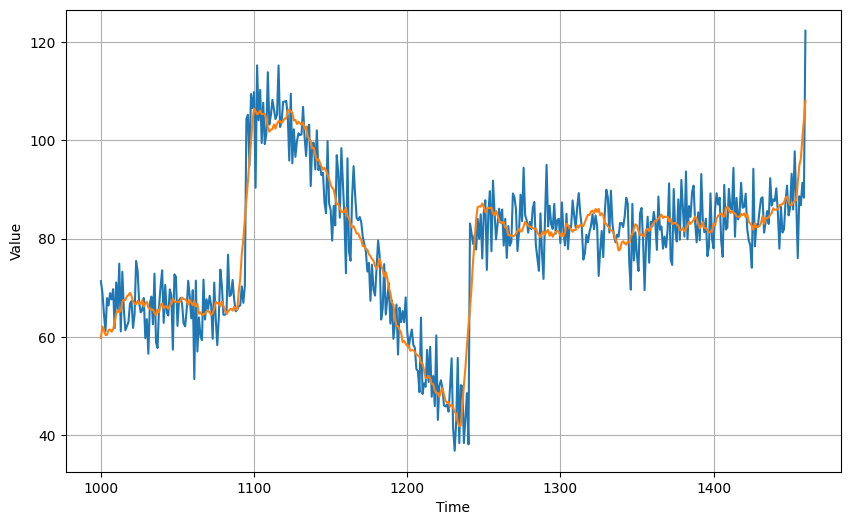

In [ ]:
diff_moving_average_plus_smoothing = moving_average_forecast(series[split_time-370: -359], 11) + diff_moving_average

plot_series(time_valid, (x_valid, diff_moving_average_plus_smoothing))

In [ ]:
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_average_plus_smoothing).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_average_plus_smoothing).numpy())

34.315723
4.605329


## My Conclusion
In this lab 2, we practice time series prediction with synthetic data.




1.   First, we get the data by generating it with function like trend (show upward/backward), seasonality (repeat pattern in preiods), noise (noisy data).
2.   Second, we split the data into train and test set. The data consists of time and values (series). So, we have four datas: time_train, x_train, time_valid, x_valid.
3. We will use the data to predict and compare it with validation data to get prediction accuracy.
4. There are several ways to predict time series data. First, we have naive_forecast. It predicts the value of time step t as value of t-1.
5. Then we plot and get accuracy. It looks like the prediction lag one step behind the x_valid. So, we try another techniques.
6. Next, we use Moving Average Forecast. It predicts values based on mean of window_size numbers before the current time step. We plot it and it looks like the prediction have so many deviations (because of the noisy data). So next, we try to reduce trend and seasonality from the data and do predicts again.
7. To reduce trend and seasonality from the data, we use Differencing. Differencing substract values at exact periods by the values of before periods. Then we do moving_average_forecast again.
8. Then add past values back to moving_average_forecast. And calculate the accuracy.
9. To improve the accuracy, we smooth the past data and add it again to moving_average_forecast.

Looks like Moving Average Forecast performs better than Naive Forecast because it considers many dots in the series.

